# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Посчитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализируйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

---
Выпишем функционал эмпирического риска линейной модели на батче размера n:
$$L_n(w) =  \frac{1}{n}\left[\sum_{i=1}^n (y_i - \langle x_i, w\rangle) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$

Пусть $X$ и $y$ - матрица объекты-признаки и вектор меток на **этом батче**. Тогда перепишем формулу в векторном виде:

$$ L_n(w) = \frac{1}{n}\|Xw - y\| ^ 2_2 + \frac{1}{C}\|w\| ^ 2_2 $$

Затем, используя правила дифференцирования функционалов, получаем:
$$\nabla L_n(w) = \frac{2}{n}X^T(Xw - y) + \frac{2}{C}w$$

В итоге:
$$\boxed{w_{new} = w_{old} - \left(\frac{2}{n}X^T(X w_{old} - y) + \frac{2}{C}w_{old}\right)}$$
---

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализируйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

---
Функционал эмпирического риска на батче размера n:
$$L_n(w) =  -\frac{1}{n}\sum_{i=1}^n \left[y_i \log a_i + (1 - y_i) \log (1 - a_i)  \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$

Для начала выпишем функцию потерь на одном i-ом объекте:
$$\mathcal{L}_i(w) = - y_i \log a_i - (1 - y_i) \log (1 - a_i)$$

Также понадобится следующее свойство сигмоиды:
$$\sigma(x) = \frac{1}{1 + e^{-x}};\quad \underline{\sigma'(x)}=\frac{e^{-x}}{(1 + e^{-x}) ^ 2}=\frac{1}{1 + e^{-x}}\cdot\frac{e^{-x}}{1 + e^{-x}}=\underline{\sigma(x) (1 - \sigma(x))}$$

Учитывая, что $a_i=\sigma(\langle x_i, w\rangle)$, и применив правило дифференцирования сложной функции, найдем градиент по w:
$$\nabla\mathcal{L}_i(w) = -y_i\frac{a_i'x_i}{a_i} + (1 - y_i)\frac{a_i'x_i}{1 - a_i}=-y_i (1 - a_i)x_i + (1 - y_i)a_ix_i=(a_i - y_i)x_i
$$

Суммируя по всем объектам в батче:
$$\nabla L_n(w)=\frac{1}{n}\sum_{i=1}^n(a_i - y_i)x_i + \frac{2}{C}w$$

Пусть $X$ и $y$ - матрица объекты-признаки и вектор меток на **этом батче**. Вектор $a = \sigma(Xw)$ - вектор предсказаний модели, сигмоида применяется к вектору $Xw$ поэлементно. Тогда можно записать в векторном виде:
$$\nabla L_n(w) = \frac{1}{n}X^T(a - y) + \frac{2}{C}w = \frac{1}{n}X^T(\sigma(Xw) - y) + \frac{2}{C}w$$

В итоге:
$$\boxed{w_{new} = w_{old} - \left(\frac{1}{n}X^T(\sigma(Xw_{old}) - y) + \frac{2}{C}w_{old}\right)}$$

Получается градиент, похожий на градиент для линейной регресии - только лишь сигмоида применяется к вектору предсказаний линейной модели.

---

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

---
По правилам дифференцирования функционалов, гессиан функционала типа невязки $\|Ax - b\|^2_2$ по вектору $x$ есть матрица $A^TA$. Значит, для задачи линейной регрессии без регуляризации это матрица $X^TX$. Эта матрица является неотрицательно определенной, поскольку:
$$\langle X^T X a, a\rangle = \langle X a, X a\rangle\ge0,~\forall a\ne\theta.$$
При этом, поскольку матрица $X$ имеет полный ранг, то в матрице $X^TX$ не будет нулевых собственных значений, а значит все собственные значения положительны, и матрица положительно определена.

Точное решение для модели с $L2$ регуляризацией (тот же самый градиент, но без усреднения по батчу):
$$\nabla L(w) = 2X^T(Xw - y) + \frac{2}{C}w=0; \quad w = \left(X^TX + \frac{1}{C}I\right)^{-1}X^Ty$$

Если есть линейно зависимые признаки, то в матрице $X^T X$ появляются собственные значения, близкие к нулю, и тогда после её обращения получаются наоборот очень большие собственные значения, однако если обращать не исходную матрицу, а матрицу сдвига $X^TX + \frac{1}{C}I$, собственные значения которой также сдвинуты на $\frac{1}{C}$, то эти близкие к нулю собственные значения можно 'отделить' от нуля.

---

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

Итак, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

---
Для удобства обозначений, пусть $p=p(y_i=1|x_i),~a(x_i)=a,~E(L|x_i)=E$, тогда:
$$-E = p\log(a)+(1-p)\log(1-a)\rightarrow max,~\frac{dE}{da}=\frac{p}{a} - \frac{1-p}{1-a}=\frac{p-a}{a(1-a)}=0 \Rightarrow a=p.$$

---

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

---
Регуляризация вводится для того, чтобы находить решения с небольшими значениями весов при признаках, однако свободный член $w_0$ отвечает лишь за сдвиг линейной комбинации признаков и остальных весов, он не обязан быть малым по значению.

---

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам ***не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y          - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча (1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X_gen = X.copy()
    y_gen = y.copy()
    if shuffle:
        np.random.shuffle(X_gen)
        np.random.shuffle(y_gen)
    for i in range(0, len(y), batch_size):
        idx = slice(i, i + batch_size)
        X_batch = X_gen[idx, :]
        y_batch = y_gen[idx, :]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
# %%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
        Вычисляем значение сигмоиды.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator,
                 C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тип модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудьте тип модели (линейная или логистическая регрессия)!
        
        1/n * ||Xw - y||^2_2 + 1/C * ||w||^2_2 - для lin_reg
        1/n * (-y^T log(a) - (1 - y)^T log(1 - a)) + 1/C * ||w||^2_2 - для log_reg
        """
        loss = 1 / self.C * (self.weights[:-1] ** 2).sum()
        
        if self.model_type == "lin_reg":
            predicts = X_batch @ self.weights
            loss += 1 / len(y_batch) * ((predicts - y_batch) ** 2).sum()
        elif self.model_type == "log_reg":
            predicts = np.apply_along_axis(sigmoid, 1, X_batch @ self.weights)
            loss += 1 / len(y_batch) * (-y_batch.T @ np.log(predicts) - 
                                        (1 - y_batch).T @ np.log(1 - predicts))
            loss = loss[0]

        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!

        2/n * X^T (Xw - y) + 2/C * w - для lin_reg
        1/n * X^T (sigma(Xw) - y) + 2/C * w - для log_reg
        """
        weights = self.weights.copy()
        weights[:-1] *= 2 / self.C
        loss_grad = weights
        
        if self.model_type == "lin_reg":
            predicts = X_batch @ self.weights
            loss_grad += 2 / len(y_batch) * X_batch.T @ (predicts - y_batch)
        elif self.model_type == "log_reg":
            predicts = np.apply_along_axis(sigmoid, 1, X_batch @ self.weights)
            loss_grad += 1 / len(y_batch) * X_batch.T @ (predicts - y_batch)
        
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # добавление константного признака в матрицу объекты-признаки
        X_train = np.hstack([X, np.ones((X.shape[0], 1))]).copy()
        
        # веса, отвечающие исходным признакам + bias
        self.weights = np.random.random_sample((X_train.shape[1], 1))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_train, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)

                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудьте тип модели (линейная или логистическая регрессия)!
        '''
        # добавление константного признака в матрицу объекты-признаки
        X_test = np.hstack([X, np.ones((X.shape[0], 1))]).copy()
        
        y_hat = X_test @ self.weights
        if self.model_type == "log_reg":
            y_hat = np.apply_along_axis(sigmoid, 1, y_hat)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    x = np.linspace(-6, 8, 2)

    # clf.weights[-1] stands for bias
    plt.plot(x, -(clf.weights[0] + clf.weights[1] * x) / clf.weights[-1])

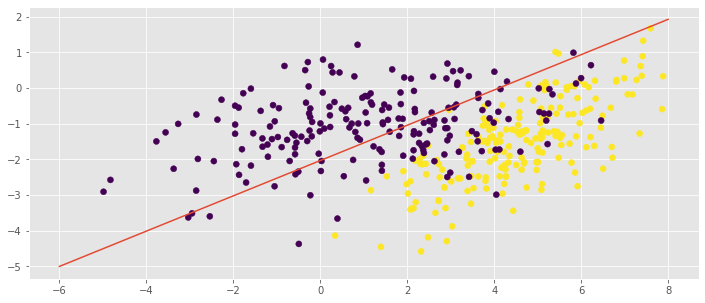

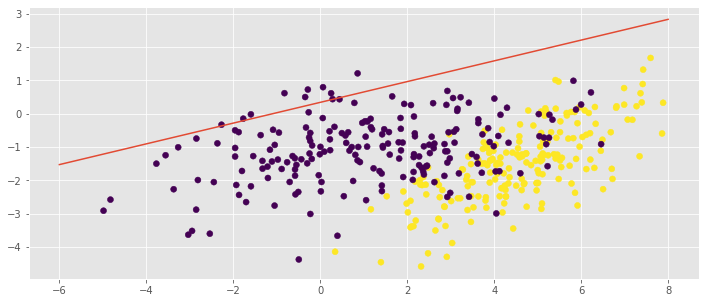

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

log_reg = MySGDClassifier(batch_generator, model_type="log_reg")
log_reg.fit(X, y[:, np.newaxis])
plot_decision_boundary(log_reg)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

lin_reg = MySGDClassifier(batch_generator, model_type="lin_reg")
lin_reg.fit(X, y[:, np.newaxis])
plot_decision_boundary(lin_reg)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
from collections import defaultdict
from tqdm import tqdm

np.random.seed(1)

alphas = np.logspace(-4, -2, 5)
model_types = ["lin_reg", "log_reg"]
batch_gen = lambda X, y: batch_generator(X, y, batch_size=1000)
losses = {}

for model_type in model_types:
    losses[model_type] = defaultdict(list)
    for alpha in tqdm(alphas):
        regressor = MySGDClassifier(batch_gen, alpha=alpha, model_type=model_type)
        regressor.fit(X, y[:, np.newaxis])
        losses[model_type][alpha] = regressor.errors_log["loss"]

100%|█████████████████████████████████████████████| 5/5 [01:15<00:00, 15.09s/it]


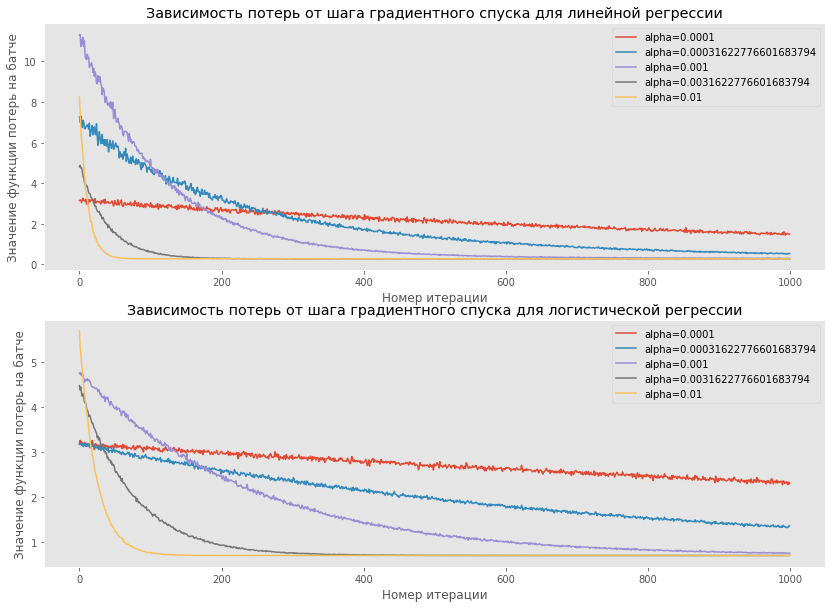

In [13]:
fig = plt.figure(figsize = (14, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for model_type, ax, title in zip(model_types, [ax1, ax2], ["линейной", "логистической"]):
    for alpha in losses[model_type]:
        loss = losses[model_type][alpha]
        ax.plot(np.arange(len(loss)), loss, label=f"{alpha=}")
        
        ax.legend()
        ax.set_xlabel("Номер итерации")
        ax.set_ylabel("Значение функции потерь на батче")
        ax.set_title(f"Зависимость потерь от шага градиентного спуска для {title} регрессии")
        ax.grid()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**Мой ответ:** Видно, что при меньших альфа сходимость достаточно медленная. Для более быстрой сходимости следует выбирать больший шаг градиентного спуска.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [14]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

C_reg = np.logspace(-3, 3, 10)
weights_mean = {}

for model_type in model_types:
    weights_mean[model_type] = []
    for C in tqdm(C_reg):
        regressor = MySGDClassifier(batch_gen, C=C, model_type=model_type)
        regressor.fit(X, y[:, np.newaxis])
        weights_mean[model_type].append(regressor.weights.mean())

100%|███████████████████████████████████████████| 10/10 [02:39<00:00, 15.92s/it]


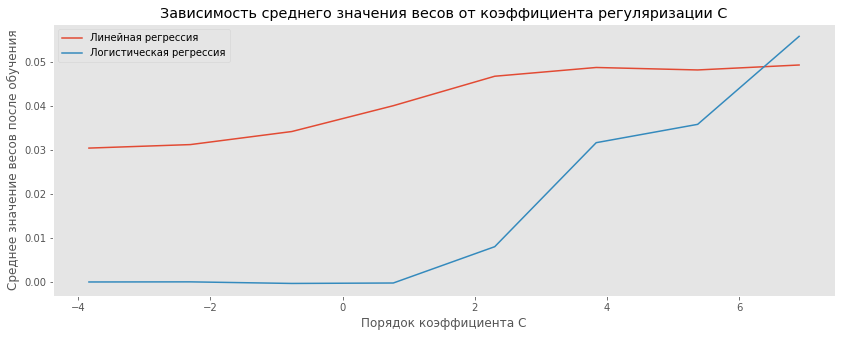

In [15]:
fig = plt.figure(figsize = (14, 5))
ax = plt.subplot(111)

ax.plot(np.log(C_reg), weights_mean["lin_reg"], label="Линейная регрессия")
ax.plot(np.log(C_reg), weights_mean["log_reg"], label="Логистическая регрессия")

ax.legend()
ax.set_xlabel("Порядок коэффициента C")
ax.set_ylabel("Среднее значение весов после обучения")
ax.set_title(f"Зависимость среднего значения весов от коэффициента регуляризации C")
ax.grid()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

**Мой ответ:** В целом, да. Видно, что чем меньше C, тем больше коэффициент перед регуляризирующим слагаемым и тем меньше становится вектор весов по норме.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [ ]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

In [ ]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [ ]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***